In [ ]:
# Installing matplotlib
# pip install matplotlib - In CMD line
# !pip install matplotlib - In Jupyter cell
# OR
# %pip install matplotlib - In Jupyter cell

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import numpy as np
# np is the alias for numpy
import pandas as pd
# pd is the alias for pandas

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading Dataset
df = pd.read_csv('Bollywood_Movies_Dataset.csv')
# Print the Type of df
print(type(df))
# Show top 5 rows
df.head()  

<class 'pandas.core.frame.DataFrame'>


,Movie_Name,BO_Collection,Budget,Box_Office_Verdict
0,Pyaar Ka Punchnama 2,53.25,25.0,Hit
1,Shandaar,38.28,68.0,Flop
2,Singh is Bliing,74.87,92.0,Flop
3,Jazbaa,24.3,30.0,Flop
4,Talvar,24,22.0,Plus


In [ ]:
# Convert data type of BO_Collectio from object to float to int
# Convert data type of Budget from float to int
# Making a new column 'Profit' by subtracting 'Budget'from 'BO_Collection'
df['BO_Collection'] = df['BO_Collection'].astype(float)
df['BO_Collection'] = df['BO_Collection'].astype(int) 
df['Budget'] = df['Budget'].astype(int)
# Making a new column 'Profit' by subtracting 'Budget'from 'BO_Collection'
df['Profit'] = df['BO_Collection']-df['Budget']
df.head()

,Movie_Name,BO_Collection,Budget,Box_Office_Verdict,Profit
0,Pyaar Ka Punchnama 2,53,25,Hit,28
1,Shandaar,38,68,Flop,-30
2,Singh is Bliing,74,92,Flop,-18
3,Jazbaa,24,30,Flop,-6
4,Talvar,24,22,Plus,2


Plotting a simple Box PLot

In [ ]:
df_top_movies=df.nlargest(n=5, columns=['BO_Collection'])
df_top_movies = df_top_movies.set_index('Movie_Name')
df_top_movies

,BO_Collection,Budget,Box_Office_Verdict,Profit
Movie_Name,,,,
PK,330,90,All Time Blockbuster,240
Bajrangi Bhaijaan,318,125,All Time Blockbuster,193
Tanu Weds Manu,148,40,Blockbuster,108
Baahubali (Hindi),111,130,Hit,-19
ABCD 2,105,60,Super Hit,45


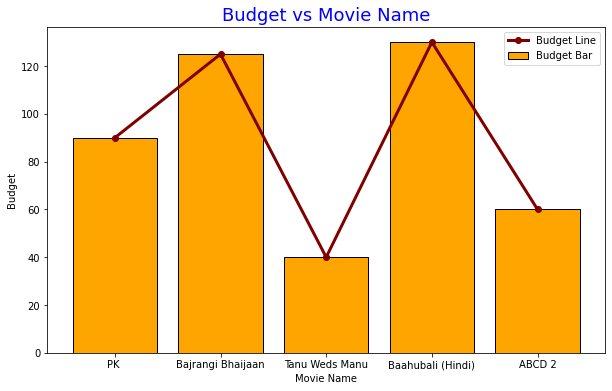

In [ ]:
plt.figure(figsize=(10,6)) # setting plot figure size
# Customizing first variable for bar plot  with color and edgecolor
plt.bar(df_top_movies.index,df_top_movies['Budget'],color='orange',edgecolor='black',label='Budget Bar')
# Customizing second variable for line plot  with color and linewidth and marker
plt.plot(df_top_movies.index,df_top_movies['Budget'],color='maroon',lw=3,marker='o',label='Budget Line')
plt.xlabel('Movie Name')  # set X-label as Movie Name
plt.ylabel('Budget')  # set X-label as Budget
plt.legend() # Setting legend for the plot 
plt.title('Budget vs Movie Name',fontsize=18,color='blue') # Setting title for the plot
plt.show() # Showing the plot

Plotting Multiple Plot using Subplots

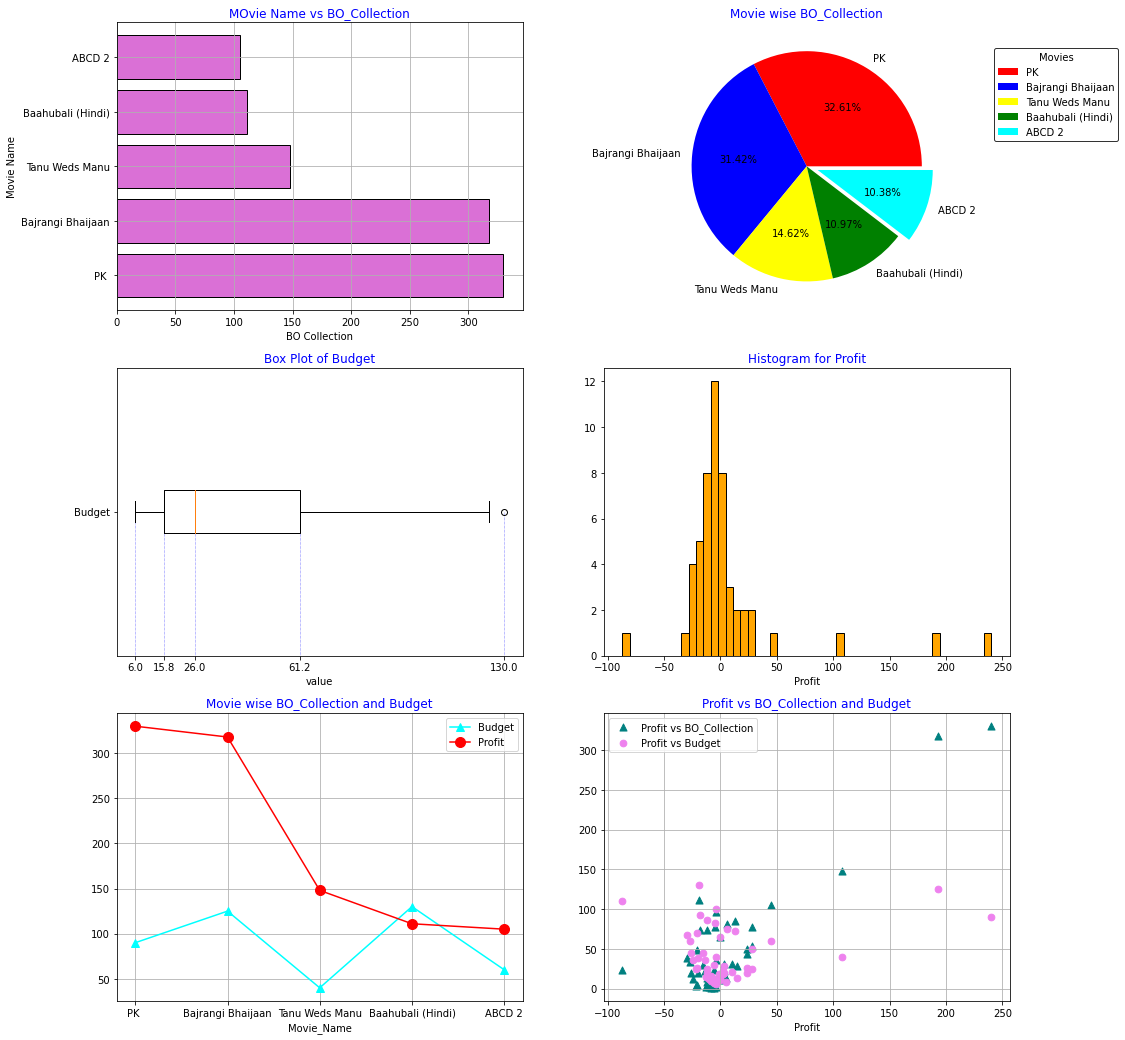

In [ ]:
# Plotting Multiple Plot using Subplots() function
# Plotting 6 plots in a single plot having 3 rows and 2 columns 
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(16,18))  # nrows=3,ncols=2
# ax1 is row1,col1, ax2 is row1,col2
# ax3 is row2,col1, ax4 is row2,col2
# ax5 is row3,col1, ax6 is row3,col2

# ax1 is row1,col1
# Making horizontal bar graph using barh() function and customizing it with color and edgecolor
ax1.barh(df_top_movies.index,df_top_movies['BO_Collection'],color='orchid',edgecolor='black')
ax1.set_xlabel('BO Collection') # set X-label as value
ax1.set_ylabel('Movie Name') # set Y-label as value
# Setting title for the plot
ax1.set_title('MOvie Name vs BO_Collection',fontsize=12,color='blue') 
ax1.grid() # Showing grid for the plot 

# ax2 is row1,
# Making a pie plot of 'Movie wise BO_Collection' and customizing it
# Customizing plot by setting Label, colors, autopact, explode, shadow and counterclock properties
ax2.pie(x = df_top_movies['BO_Collection'],labels=df_top_movies.index,
        colors=['red','blue','yellow','green','cyan'],autopct='%.2f%%',
       explode=(0,0,0,0,0.1))
# Setting title for the plot
ax2.set_title('Movie wise BO_Collection',fontsize=12,color='blue')
# Setting legend for the plot with Legend title, location and bbox_to_anchor properties
ax2.legend(df_top_movies.index,  title="Movies",loc='right', bbox_to_anchor=(1, 1,0.6,-0.5),edgecolor='black')

# ax3 is row2,col1
# Configuring box plot
# setting vert =  false, so as to make plot horizontal
# setting manage_ticks=True, so that the tick locations and labels will be adjusted to match the boxplot positions.
ax3.boxplot(df['Budget'], vert=False, manage_ticks=True) 
ax3.set_xlabel('value') # set X-label as value
ax3.set_yticks([1]) # set Y-tick location 
ax3.set_yticklabels(['Budget']) # set Y-tick label
# Calculate Quantiles for Budget column
quantiles = np.quantile(df['Budget'], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
# Setting vlines to add vertical lines in data coordinates and configuring them.
ax3.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax3.set_ylim(0.5, 1.5) #Setting Y limit for box plot
ax3.set_xticks(quantiles) # showing quantiles on X-axis
# Setting title for the plot
ax3.set_title('Box Plot of Budget',fontsize=12,color='blue')

# ax4 is row2,col2
# Making a Histogram fro Profit
ax4.hist(df['Profit'],color='orange',edgecolor='black',bins=50)
ax4.set_title('Histogram for Profit',fontsize=12,color='blue')
ax4.set_xlabel('Profit') # Setting x-label

# ax5 is row3,col1
# Making multiple line plot in single plot
# Customizing first variable line with color, axis, width and position
ax5.plot(df_top_movies.index,df_top_movies['Budget'],color='cyan',marker='^',label='Budget',markersize=8)
# Customizing second variable line with color, axis, width and position
ax5.plot(df_top_movies.index,df_top_movies['BO_Collection'],color='red',marker='o',label='Profit',markersize=10)
# Setting title for the plot
ax5.set_title('Movie wise BO_Collection and Budget',fontsize=12,color='blue')
ax5.set_xlabel('Movie_Name') # Setting x-label
ax5.legend() # Showing Legend for the plot
ax5.grid() # Showing grid for the plot 


# ax6 is row3,col2
# Making multiple scatter plot in a single plot
# Customizing first variable markers with type, size, color and label 
ax6.scatter(df['Profit'],df['BO_Collection'],marker='^',s=50,color='teal',label='Profit vs BO_Collection')
# Customizing second variable markers with type, size, color and label 
ax6.scatter(df['Profit'],df['Budget'],marker='o',s=45,color='violet',label='Profit vs Budget')
ax6.set_xlabel('Profit') # Setting x-label
# Setting title for the plot
ax6.set_title('Profit vs BO_Collection and Budget',fontsize=12,color='blue')
ax6.grid() # Showing grid for the plot 
ax6.legend() # Showing Legend for the plot

plt.show() # Showing the plot

Creating  3D Plots

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

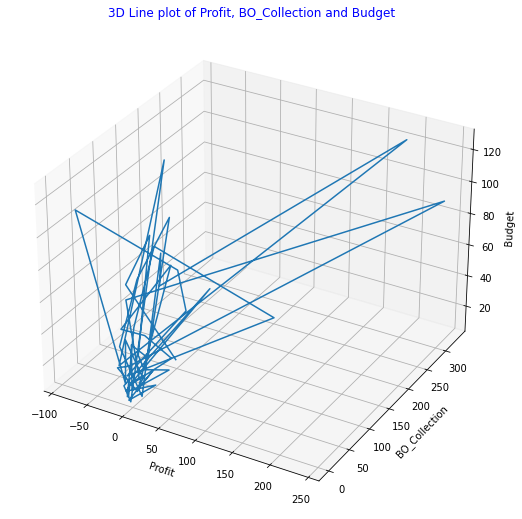

In [ ]:
# Plotting 3D Line Plot
fig = plt.figure(figsize=(12,9)) # setting plt figuresize
ax = fig.add_subplot(projection='3d') # Defining Projection as '3d'
# Defining X,Y and Z axis for the plot and plot type as line by using plot() function
ax.plot(df['Profit'], df['BO_Collection'], df['Budget'])
ax.set_xlabel('Profit') # Setting x-label
ax.set_ylabel('BO_Collection') # Setting y-label
ax.set_zlabel('Budget') # Setting z-label
# Setting title for the plot
ax.set_title('3D Line plot of Profit, BO_Collection and Budget',fontsize=12,color='blue')
plt.show() # Showing the plot

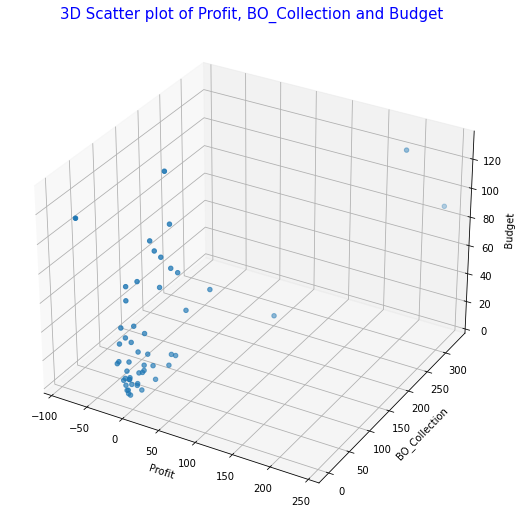

In [ ]:
# Plotting 3D Scatter Plot
fig = plt.figure(figsize=(12,9)) # setting plt figuresize
ax = fig.add_subplot(projection='3d') # Defining Projection as '3d'
# Defining X,Y and Z axis for the plot and plot type as line by using plot() function
ax.scatter(df['Profit'], df['BO_Collection'], df['Budget'])
ax.set_xlabel('Profit') # Setting x-label
ax.set_ylabel('BO_Collection') # Setting y-label
ax.set_zlabel('Budget') # Setting z-label
# Setting title for the plot
ax.set_title('3D Scatter plot of Profit, BO_Collection and Budget',fontsize=15,color='blue')
plt.show() # Showing the plot

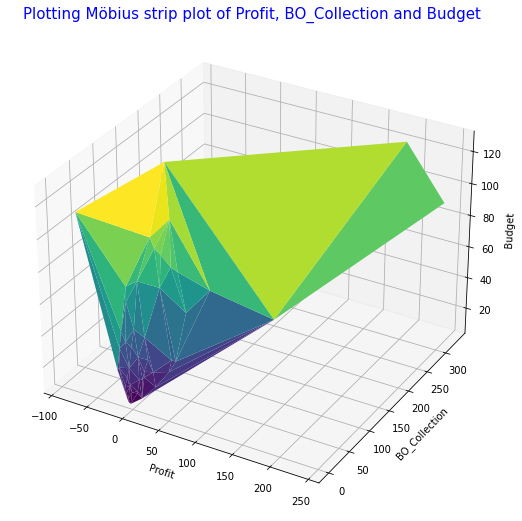

In [ ]:
# Plotting Möbius strip
fig = plt.figure(figsize=(12,9)) # setting plt figuresize
ax = fig.add_subplot(projection='3d') # Defining Projection as '3d'
# Defining X,Y and Z axis for the plot and plot type as 'plot_trisurf' by using plot_trisurf() function 
# Customizing the plot with color using cmap and setting line width as 0.5
ax.plot_trisurf(df['Profit'], df['BO_Collection'], df['Budget'],cmap ='viridis', linewidths = 0.5)
ax.set_xlabel('Profit') # Setting x-label
ax.set_ylabel('BO_Collection') # Setting y-label
ax.set_zlabel('Budget') # Setting z-label
# Setting title for the plot
ax.set_title('Plotting Möbius strip plot of Profit, BO_Collection and Budget',fontsize=15,color='blue')
plt.show() # Showing the plot